In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [3]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [4]:
p['a']

PointDataDim(a : [0.00000000e+00 6.18737096e-05 1.84156883e-04 6.57392210e-04
 8.39029343e-04 1.52605373e-04 3.18084398e-03 5.46869047e-04
 3.83685393e-03 3.22622088e-03 3.51552456e-03 1.02614338e-04
 3.19974377e-03 8.97717255e-03 1.25172261e-02 1.40965724e-02
 2.13152809e-02 1.67314960e-03 1.43769466e-02 7.06526905e-03
 3.77922462e-02 4.32538895e-02 2.93017739e-02 1.56013143e-02
 3.36295353e-02 2.19976523e-02 1.50654872e-02 1.80177961e-04
 1.26126497e-02 2.10668051e-02 8.77823106e-02 9.10506518e-02
 1.59159711e-02 6.65794520e-02 8.50699505e-02 1.21586787e-01
 1.10844706e-02 9.76168034e-02 1.03803586e-01 1.89645510e-02
 4.67752463e-02 7.20076428e-02 5.97186856e-02 1.32121562e-01
 1.76556624e-01 1.38327279e-01 1.06231808e-01 5.69931960e-03
 4.47072819e-02 1.68459566e-01 8.19062761e-02 1.19616644e-01
 1.42198722e-01 1.22763870e-01 1.66851942e-01 4.02181934e-02
 2.20393683e-01 1.97712645e-01 1.47010246e-01 9.18856808e-02
 3.63649769e-02 1.19964105e-01 3.35014859e-01 2.63964057e-02
 2.0595

In [5]:
np.array(p['a'])

array([0.00000000e+00, 6.18737096e-05, 1.84156883e-04, 6.57392210e-04,
       8.39029343e-04, 1.52605373e-04, 3.18084398e-03, 5.46869047e-04,
       3.83685393e-03, 3.22622088e-03, 3.51552456e-03, 1.02614338e-04,
       3.19974377e-03, 8.97717255e-03, 1.25172261e-02, 1.40965724e-02,
       2.13152809e-02, 1.67314960e-03, 1.43769466e-02, 7.06526905e-03,
       3.77922462e-02, 4.32538895e-02, 2.93017739e-02, 1.56013143e-02,
       3.36295353e-02, 2.19976523e-02, 1.50654872e-02, 1.80177961e-04,
       1.26126497e-02, 2.10668051e-02, 8.77823106e-02, 9.10506518e-02,
       1.59159711e-02, 6.65794520e-02, 8.50699505e-02, 1.21586787e-01,
       1.10844706e-02, 9.76168034e-02, 1.03803586e-01, 1.89645510e-02,
       4.67752463e-02, 7.20076428e-02, 5.97186856e-02, 1.32121562e-01,
       1.76556624e-01, 1.38327279e-01, 1.06231808e-01, 5.69931960e-03,
       4.47072819e-02, 1.68459566e-01, 8.19062761e-02, 1.19616644e-01,
       1.42198722e-01, 1.22763870e-01, 1.66851942e-01, 4.02181934e-02,
      

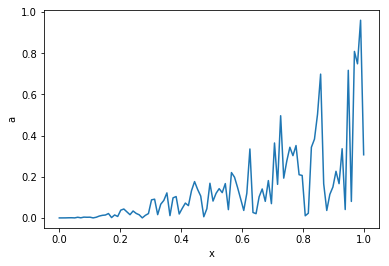

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
p2 = pn.PointData(x=np.random.rand(100))
#p2['x'] = np.random.rand(200)

In [8]:
p2

PointData(OrderedDict([('x', array([0.99407932, 0.04867391, 0.82505766, 0.75226823, 0.83310386,
       0.5450001 , 0.00262178, 0.68629474, 0.21550218, 0.91060661,
       0.97554403, 0.3987015 , 0.39789945, 0.91256637, 0.98409139,
       0.24230707, 0.67946102, 0.43700152, 0.978077  , 0.28809779,
       0.94905503, 0.67175014, 0.72578862, 0.27129466, 0.88808247,
       0.34192749, 0.29293348, 0.69504829, 0.20969468, 0.35570126,
       0.63654894, 0.32172331, 0.07389724, 0.10227909, 0.981846  ,
       0.38157692, 0.74670892, 0.22980259, 0.18351812, 0.41331443,
       0.54598582, 0.01792148, 0.02474916, 0.11340415, 0.4653499 ,
       0.46525705, 0.72544306, 0.4221168 , 0.60639859, 0.84044157,
       0.40862744, 0.15587068, 0.13366382, 0.24871773, 0.57871718,
       0.79422217, 0.63794506, 0.36792877, 0.43526479, 0.32712013,
       0.50810845, 0.56596659, 0.7746838 , 0.71304757, 0.12406792,
       0.95485072, 0.57450786, 0.49539745, 0.5284513 , 0.6722357 ,
       0.13310264, 0.37367033, 0.

In [9]:
#p2.plot()
#p2['a'] = p.interpolate('a', method='linear')#(p2).plot('x', 'a', '.')
p2 = p.interp(pn.PointData(x=np.random.rand(100)), method='linear')#.plot('x', 'a', '.')

AttributeError: attribute '__doc__' of 'method' objects is not writable

In [ ]:
type(p2)

In [ ]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(method='nearest', x=np.linspace(0,1,1000)).plot('a')

In [10]:
p.interp(p2)

AttributeError: attribute '__doc__' of 'method' objects is not writable

get item 0
get item 0


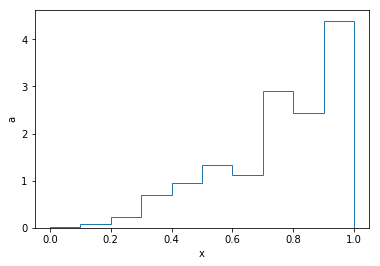

In [11]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x').plot('a')

AttributeError: attribute '__doc__' of 'method' objects is not writable

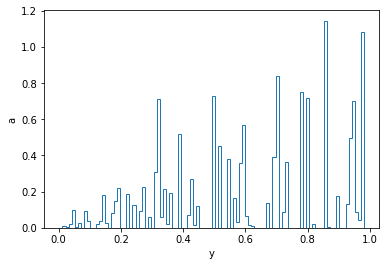

In [12]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

In [ ]:
p.histogram('y').plot('a')
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000).plot('a')

In [ ]:
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000, method='cubic').plot('a')

In [ ]:
g = p.histogram(x=10)

In [ ]:
g.interp(x=100).plot('a')

In [ ]:
g.interp(x=100)

In [ ]:
pn.interp(g, x=100)

In [ ]:
pn.interpolate_fun

In [ ]:
p.histogram(x=10).grid

In [ ]:
# or in one line
p.histogram('a')('x').plot()

In [ ]:
# we can also evaluate the histogram in different dimensions
p.histogram('a')('x', 'y').plot(cbar=True)

In [ ]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('a')('x').plot()
g = p.histogram('a')('x').resample('a')(x=13)
p.histogram('a')('x').resample('a')(x=3).plot()


In [ ]:
g['a']

In [ ]:
f = p.histogram('a')('x').resample('a')

In [ ]:
f(f(x=8)).plot()

In [ ]:
# or the function from before in a different binnig
f(x=30).plot()

In [ ]:
# a histogram with no weights, evaluated in y
p.histogram()(y=np.linspace(0,1,33)).plot()

In [ ]:
# the returned object is a GridData type
g = p.histogram('a')(x=20)

In [ ]:
# it has a grid defined
g

In [ ]:
# this evaluates the function from earlier on g
f(g).plot()

In [ ]:
g

In [ ]:
# or assign it a new variable which will automatically evaluate (looks a bit abstract)
g['blah'] = f(g)
g.plot('blah')

In [ ]:
f(g)

In [ ]:
g

In [ ]:
g.lookup('blah')(p).plot('x', 'blah')#'x', 'blah')
g.resample('blah')(x=3).plot()#'x', 'blah')

In [ ]:
#p['blah'] = 

p2 = g.lookup('blah')(p)

In [ ]:
p2 = pn.PointData()
p2['x'] = np.linspace(0,1,33)

In [ ]:
p2['blah'] = g.lookup('blah')(p2)

In [ ]:
p2['f'] = g.lookup('blah')(p2)

In [ ]:
p2

In [ ]:
p.plot('x', 'y')

In [ ]:
p.data

In [ ]:
# or again all together
g['blah'] = p.histogram('a')(g)
g.plot('blah')

In [ ]:
p.binwise('a', method='mean')('x', y=20)['a']#.plot()

In [ ]:
p.binwise('a', method='mean')('x', y=20).plot()

In [ ]:
p.binwise('a', function=lambda x : np.percentile(x,50))('x', y=20)['a']

In [ ]:
g = pn.GridData('x','y')

In [ ]:
g.grid

In [ ]:
g['b'] = p.histogram()(g)

In [ ]:
p.histogram()(g)

In [ ]:
g.grid

In [ ]:
g.plot(cbar=True)

In [ ]:
g['x']

In [ ]:
g['c'] = p[p['x'] < 0.5].histogram()(g)
g.plot('c')

In [ ]:
grid = pn.grid.Grid(x=[0., 0.5,np.inf], y=10)

In [ ]:
p.binwise('a', method='mean')(grid).histogram('a')('x').plot()

In [ ]:
p[p['x'] < 1].histogram()

In [ ]:
# let's go a bit crazy....what's f(f(x))?
# it's the same as f(x) here because we already histogrammed

In [ ]:
f(f('x')).plot()

In [ ]:
# or first histogram it in x and y and then only x.....again the same
f('x').histogram('a')('x').plot()

In [ ]:
p.vars

In [ ]:
g = f(x=100)

In [ ]:
g.plot('a')

In [ ]:
g.grid.point_meshgrid

In [ ]:
g.interpolate('a', method='cubic')(x=100).plot()

In [ ]:
np.concatenate([[1,2,3], [3,4]])

In [ ]:
a = {'x':2}

In [ ]:
a.update({'y':7})

In [ ]:
a

In [ ]:
from collections import OrderedDict

In [ ]:
a = OrderedDict({'x':2})


In [ ]:
a

In [ ]:
a.update({'y':7})

In [ ]:
a

In [ ]:
a.update({'x':23})

In [ ]:
a

In [ ]:
a['k'] = a.pop('y')

In [ ]:
a

In [ ]:
a = np.arange(24).reshape(4,3,2)

In [ ]:
a

In [ ]:
a.reshape(-1, *a.shape[2:])[0] +=1

In [ ]:
a

In [ ]:
p2['b'] = np.arange(len(p2)*2).reshape(-1,2)

In [ ]:
#p2.histogram('b')('x')

In [ ]:
list(range(10))[2:]

In [ ]:
isinstance(3., float)

In [ ]:
g.grid
#

In [ ]:
g.resample('a')(x=0.5).grid

In [ ]:
g.resample('a')(x=0.5).plot()
g.resample('a')(x=0.03).plot()
g.resample('a')(x=0.01).plot()

In [ ]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

img1d = np.average(img, axis=-1)

In [ ]:
img1d.shape

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img1d)

In [ ]:
g = pn.GridData()#x=np.arange(1281), y=np.arange(723))

In [ ]:
g['img'] = img1d.T[:,::-1]

In [ ]:
g.plot('img', cmap='gray')

In [ ]:
#gs = g.resample('img')(x=0.1, y=0.1)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = g.binwise('img', method='mean')
f('x').plot(ax=ax[0])
f('y').plot(ax=ax[1])

In [ ]:
N = 300
pd = pn.PointData(x=np.random.rand(N)*1280, y=np.random.rand(N)*722)

In [ ]:
pd['img'] = g.lookup('img')(pd)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = pd.binwise('img', method='mean')
f(x=20).plot(ax=ax[0])
f('y').plot(ax=ax[1])

In [ ]:
pd

In [ ]:
pd['img']

In [ ]:
pd.plot_scatter('x', 'y', 'img', s=0.1)

In [ ]:
pd.interpolate('img', method='nearest')(g).plot(cmap='jet')

In [ ]:
pd.interpolate('img', method='nearest')(g).binwise('img', method='mean')('y').plot()